# Data cleaning 2: missing values

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine

from config import usr, pwd, url, port, db

%matplotlib inline

In [2]:
engine = create_engine(f"postgresql+psycopg2://{usr}:{pwd}@{url}:{port}/{db}")

In [3]:
query = f'''
SELECT
    *
FROM
    {db};
'''

In [4]:
df = pd.read_sql_query(query, con=engine)

In [5]:
engine.dispose()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1492.0,2.004434e+03,7.393983e+00,1992.000000,1.998000e+03,2.004000e+03,2.011000e+03,2.017000e+03
ENROLL,1229.0,9.159308e+05,1.065280e+06,43866.000000,2.583140e+05,6.483130e+05,1.014528e+06,6.307022e+06
TOTAL_REVENUE,1280.0,9.092082e+06,1.174519e+07,465650.000000,2.186305e+06,5.079546e+06,1.085985e+07,8.921726e+07
FEDERAL_REVENUE,1280.0,7.663723e+05,1.145242e+06,31020.000000,1.893540e+05,4.033765e+05,8.289660e+05,9.990221e+06
STATE_REVENUE,1280.0,4.216553e+06,5.543072e+06,0.000000,1.153097e+06,2.537074e+06,5.080939e+06,5.090457e+07
LOCAL_REVENUE,1280.0,4.109157e+06,5.482971e+06,22093.000000,7.158345e+05,2.055780e+06,4.768680e+06,3.610526e+07
TOTAL_EXPENDITURE,1280.0,9.196681e+06,1.197813e+07,481665.000000,2.165404e+06,5.234506e+06,1.074519e+07,8.532013e+07
INSTRUCTION_EXPENDITURE,1280.0,4.762966e+06,6.293004e+06,265549.000000,1.168032e+06,2.657452e+06,5.568028e+06,4.396452e+07
SUPPORT_SERVICES_EXPENDITURE,1280.0,2.680331e+06,3.353349e+06,139963.000000,6.357900e+05,1.525406e+06,3.229651e+06,2.605802e+07
OTHER_EXPENDITURE,1229.0,4.292046e+05,5.340693e+05,11541.000000,1.028310e+05,2.715960e+05,5.186000e+05,3.995951e+06


## Variable Types
Review each column and group into its variable type. Print out each group and the columns they include.

In [8]:
variable_types = {
    'Continuous-interval': ['YEAR', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
                            'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
    'Continuous-ratio': ['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
                        'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G',
                        'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'ENROLL'],
    'Catagorical-nominal': ['PRIMARY_KEY', 'STATE'],
    'Categorical-ranked': []
}

In [9]:
for key, value in variable_types.items():
    if value:
        print(f'{key}:\n {value}\n')

Continuous-interval:
 ['YEAR', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

Continuous-ratio:
 ['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'ENROLL']

Catagorical-nominal:
 ['PRIMARY_KEY', 'STATE']



## Missing Values
Define a function to return a list of columns containing missing values. Also, print out the fractions of missing values.

In [10]:
def find_na_columns(df):
    na_fractions = (df.isnull().sum()/df.isnull().count())*100
    print('Fractions of missing values per column:')
    print(na_fractions[na_fractions != 0])
    return na_fractions[na_fractions != 0].index.tolist()

### ENROLL and GRADES_ALL
Both of these values should be comporable. So, if one is missing, then replace it with the other value, and visa versa.

In [11]:
df.loc[df['ENROLL'].notnull(), ['ENROLL', 'GRADES_ALL_G']].head()

,ENROLL,GRADES_ALL_G
36,89711.0,NaN
52,727716.0,677690.0
53,121156.0,115619.0
54,676297.0,647299.0
55,311432.0,407329.0


In [12]:
df_clean = df.copy()

In [13]:
df_clean.loc[df['ENROLL'].isnull(), 'ENROLL'] = df_clean.loc[df_clean['ENROLL'].isnull(), 'GRADES_ALL_G'].values

In [14]:
df_clean.loc[df['GRADES_ALL_G'].isnull(), 'GRADES_ALL_G'] = df_clean.loc[df_clean['GRADES_ALL_G'].isnull(), 'ENROLL'].values

### Additional Missing Values

In [15]:
na_columns = find_na_columns(df_clean)

Fractions of missing values per column:
ENROLL                           7.506702
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                     7.506702
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64.276139
AVG_READING_8_SCORE             66.621984
dtype: float64


In [16]:
print(f'Columns with missing values:\n{na_columns}')

Columns with missing values:
['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


### All
Ignore the year column and fill missing values with the mean value for that column.

In [17]:
df_clean_1 = df_clean.copy()

In [18]:
for column in na_columns:
    df_clean_1.loc[:, column].fillna(df_clean_1.loc[:, column].mean(), inplace=True)

In [19]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

### Year-by-year
Now, include years. Group `DataFrame` by year. For each year set all missing values equal to the mean value for that year.

In [20]:
years_list = df_clean['YEAR'].unique().tolist()

In [21]:
df_clean_2 = df_clean.copy()

In [22]:
for column in na_columns:
    for year in years_list:
        mean_value = df_clean_2.loc[df_clean_2['YEAR'] == year, column].mean()
        df_clean_2.loc[df_clean_2['YEAR'] == year, column].fillna(mean_value, inplace=True)

In [23]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1380 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

### Using Interpolation
Use Pandas `interpolation()` method to fill in the missing values.

In [24]:
df_clean_3 = df_clean.copy()

In [25]:
for column in na_columns:
    for year in years_list:
        df_clean_3[column].interpolate(inplace=True)

In [26]:
df_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

## Compare techniques
Compare each technique for dealing with missing values by using box plots.

In [27]:
# Add column to each DataFrame so that it can be distinguished.
df['type'] = ['original' for _ in range(len(df))]
df_clean_1['type'] = ['all' for _ in range(len(df_clean_1))]
df_clean_2['type'] = ['year-by-year' for _ in range(len(df_clean_2))]
df_clean_3['type'] = ['interpolated' for _ in range(len(df_clean_3))]

In [28]:
df_concat = pd.concat([df, df_clean_1, df_clean_2, df_clean_3])

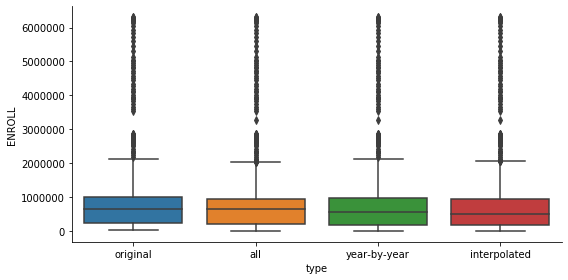

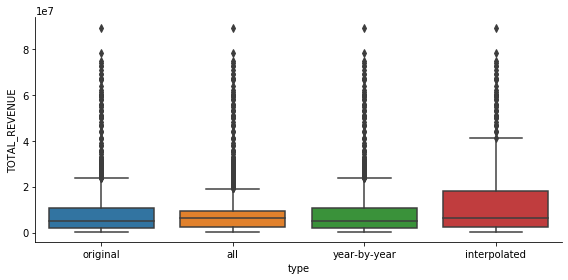

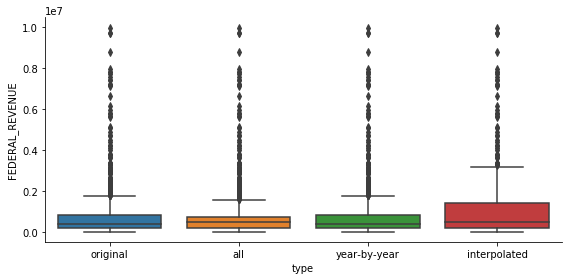

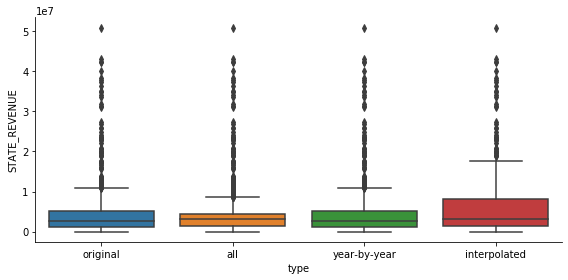

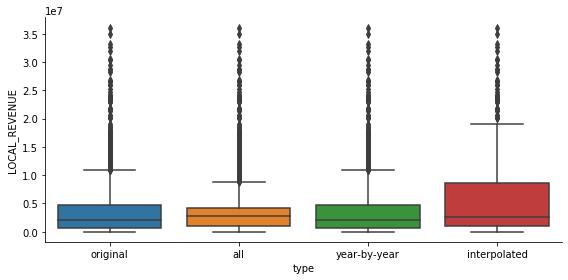

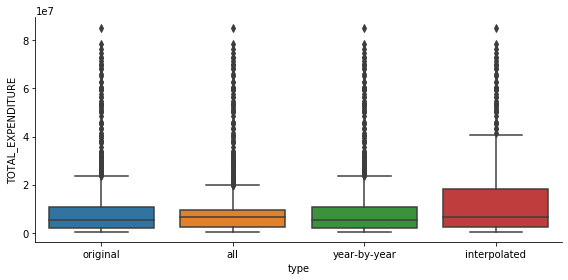

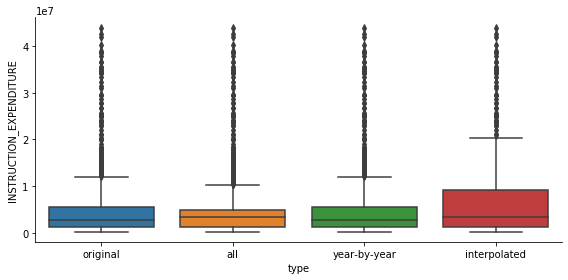

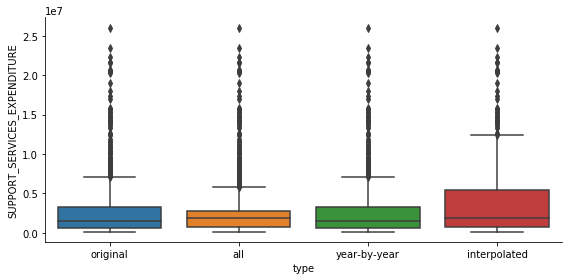

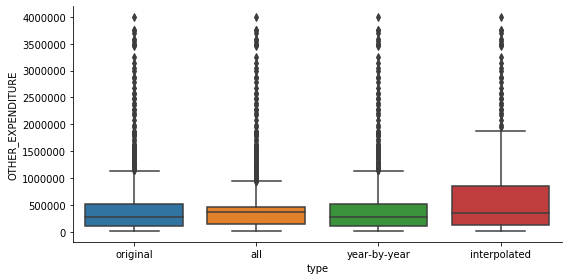

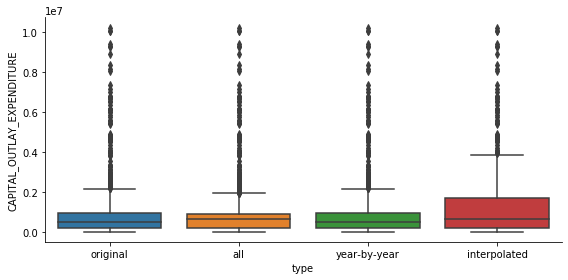

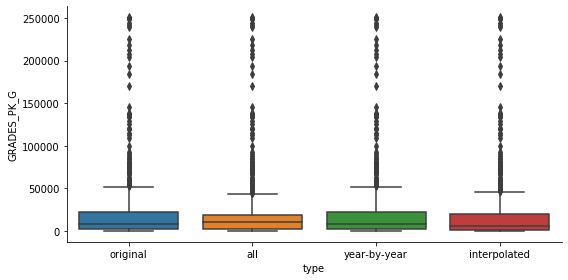

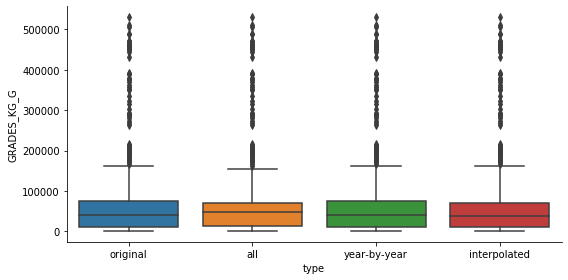

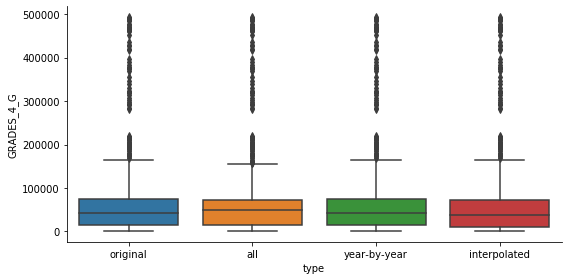

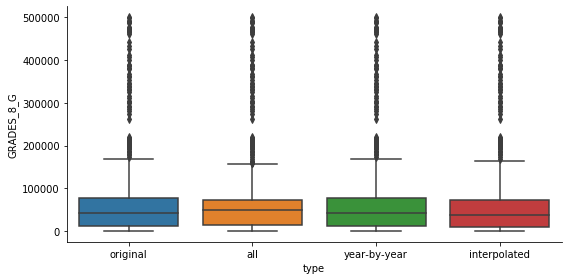

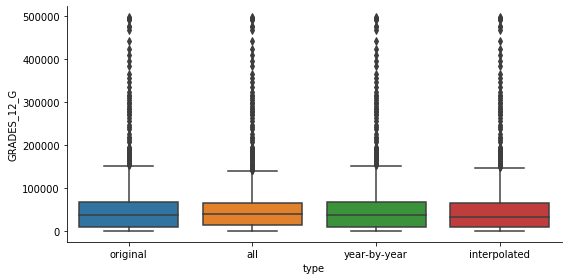

In [ ]:
for column in na_columns:
    sns.catplot(x='type', y=column, data=df_concat, height=4, aspect=12/6, kind='box')
    plt.show()